In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pplt

In [16]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [17]:
master = pd.read_csv('master.csv')

All the data is stored within the master dataframe.

At this point, we have to separate developed vs developing countries. A new column 'Type' will be created to determine whether a country is developed or not and it's based GDP per capita. If GDP per capita is higher than $20,000, the country is determined to be a developed country. 

In [18]:
master['Type'] = np.where(master['gdp_per_capita ($)'] > 20000, 'Developed', 'Developing')

Now, we have to weed out the countries that have bad data in them. An explanation of what entails bad data has been shown in the report. First, we'll create a list of bad countries and then those rows will be removed from in a new dataset (master_good)

In [19]:
bad_countries = ['Dominica',
'Grenada',
'Jamaica',
'Kiribati',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and Grenadines',
'San Marino',
'Seychelles',
'Albania',
'Antigua and Barbuda',
'Armenia',
'Aruba',
'Azerbaijan',
'Bahamas',
'Bahrain',
'Barbados',
'Belize',
'Bulgaria',
'Costa Rica',
'Cyprus',
'Macau',
'Maldives',
'Malta',
'Mongolia',
'Monte Negro',
'Nicaragua',
'Oman']

years = [2016]     

In [24]:
master_good = master[~(master['country'].isin(bad_countries) | master['year'].isin(years))] 
master_good

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Type
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent,Developing
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Developing
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Developing
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Developing
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Developing


In [25]:
pplt.rcParams["figure.figsize"] = (18,10)

<b> Plotting developed vs developing countries</b>

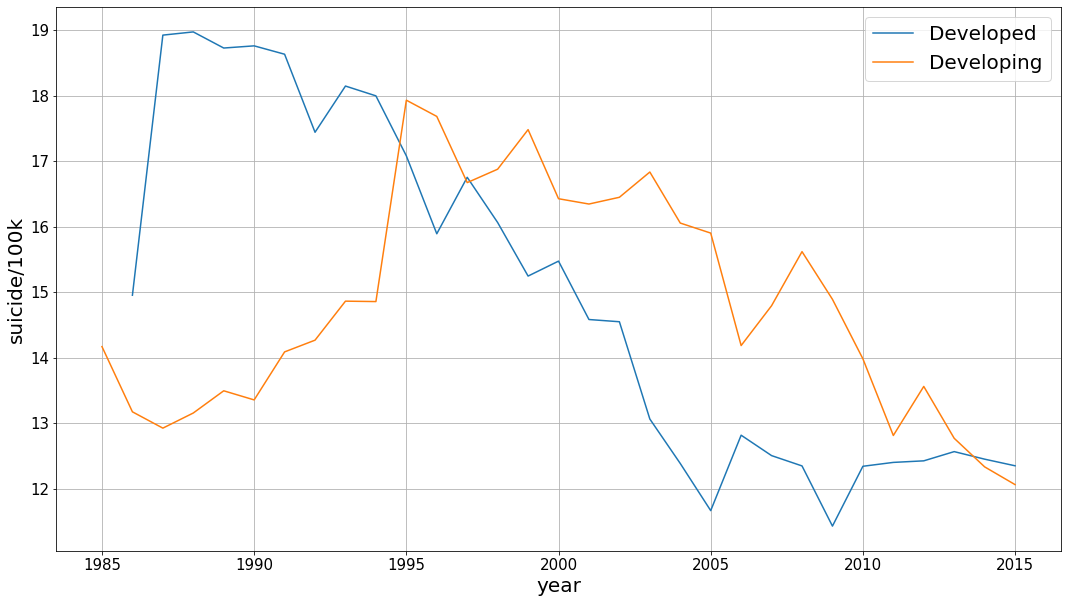

In [26]:
master_good.groupby(['year','Type'])['suicides/100k pop'].mean().unstack().plot()
#pplt.figure(figsize=(20,10))
#pplt.plot(master_good_dev, label=['Developed','Developing'])
#pplt.figure(figsize=(20,10))
pplt.legend(loc='upper right', fontsize=20)
pplt.xticks(fontsize=15)
pplt.yticks(fontsize=15)
pplt.xlabel('year',fontsize=20)
pplt.ylabel('suicide/100k',fontsize=20)
pplt.grid()


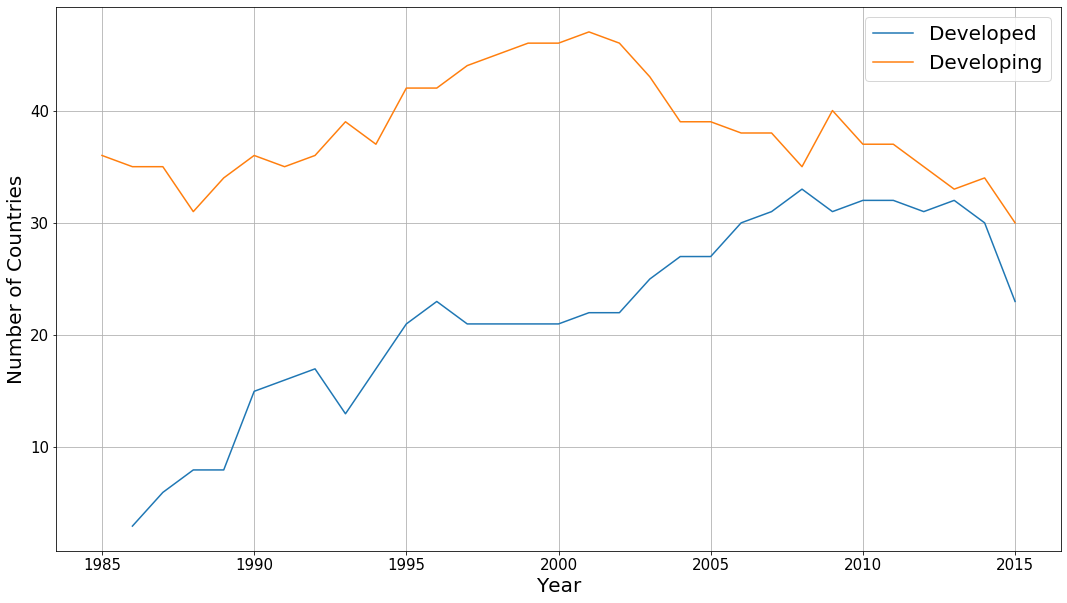

In [27]:
master_good1=master_good.groupby(['year','country','Type'])['country'].count()
master_good1.groupby(['year','Type']).count().unstack().plot()
#pplt.figure(figsize=(20,10))
#pplt.plot(master_good_dev, label=['Developed','Developing'])
#pplt.figure(figsize=(20,10))
pplt.legend(loc='upper right', fontsize=20)
pplt.xticks(fontsize=15)
pplt.yticks(fontsize=15)
pplt.xlabel('Year',fontsize=20)
pplt.ylabel('Number of Countries',fontsize=20)
pplt.grid()

<b>Breakdown by continents</b>

We'll need to import a library called geonamescache. This library will help us categorize countries into continents automatically. 

In [28]:
from geonamescache import GeonamesCache

First step is to find the country names in the library and compare it to the country names in the dataset

In [29]:
countries = GeonamesCache().get_countries_by_names()
sorted(set(master_good['country'].unique()) - set(countries.keys()))

['Czech Republic', 'Republic of Korea', 'Russian Federation']

Czech Republic, Republic of Korea and Russian Federation are named differently in the two datasets. Viewing all the countries in the dataset

In [30]:
for country in countries:
    if "Russia" in country:
        print (country)
    if "Korea" in country:
        print (country)
    if "Czech" in country:
        print (country)

Czechia
North Korea
South Korea
Russia


So, we can see that Czech Republic, Republic of Korea and Russian Federation are named as Czechia, South Korea
and Russia respectively in the library. We'll have to change the names within the out dataframe to match with the library

In [31]:
master_good.replace('Republic of Korea','South Korea', inplace=True)
master_good.replace('Czech Republic','Czechia', inplace=True)
master_good.replace('Russian Federation','Russia', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [32]:
sorted(set(master_good['country'].unique()) - set(countries.keys()))

[]

Running the comparison again and we see that there's no difference now.

We'll be creating a new column called iso3 which will convert countries into ISO3 codes for countries. To map the country names to the appropriate ISO3 codes, we'll be using mapper method from geonamescache.

In [33]:
from geonamescache.mappers import country

mapper = country(from_key='name', to_key='iso3')

country_index = {}

master_good['iso3'] = master_good.country.apply(lambda x: country_index.get(x, mapper(x)))
assert all(~master_good['iso3'].isna())
master_good.head()

/home/pjammu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Type,iso3
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing,ARG
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing,ARG
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent,Developing,ARG
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing,ARG
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers,Developing,ARG


Next, we'll import a library called pycountry_convert and use a function to first convert the iso3 code to a 2 letter country code using country_name_to_country_alpha2. This 2 letter code will then be converted to the corresponding 2 letter continent for the country by using country_alpha2_to_continent_code. The returned data then used to create a new column called continent

In [34]:
import pycountry_convert as pc

def country_to_cont(country_name):
    country_code = pc.country_name_to_country_alpha2(str(country_name), cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    return continent_name

master_good['continent'] = master_good['country'].apply(lambda x: country_to_cont(x))

master_good

/home/pjammu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Type,iso3,continent
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing,ARG,SA
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing,ARG,SA
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent,Developing,ARG,SA
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,Developing,ARG,SA
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers,Developing,ARG,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Developing,UZB,AS
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Developing,UZB,AS
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Developing,UZB,AS
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Developing,UZB,AS


Now we will plot the suicide rates based on continents

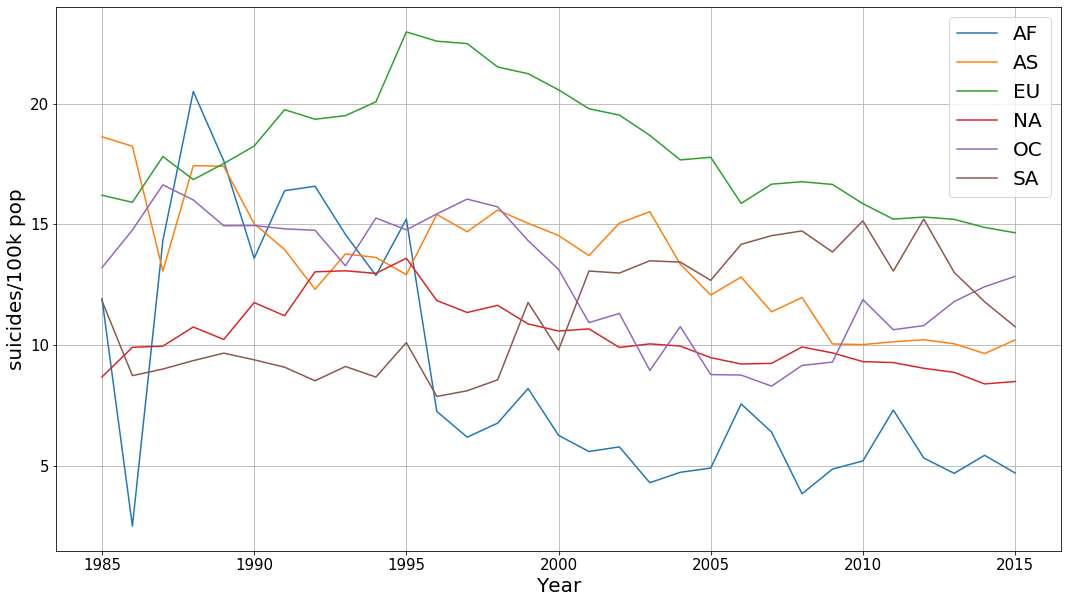

In [35]:
master_good.groupby(['year','continent'])['suicides/100k pop'].mean().unstack().plot()

pplt.legend(loc='upper right', fontsize=20)
pplt.xticks(fontsize=15)
pplt.yticks(fontsize=15)
pplt.xlabel('Year',fontsize=20)
pplt.ylabel('suicides/100k pop',fontsize=20)
pplt.grid()

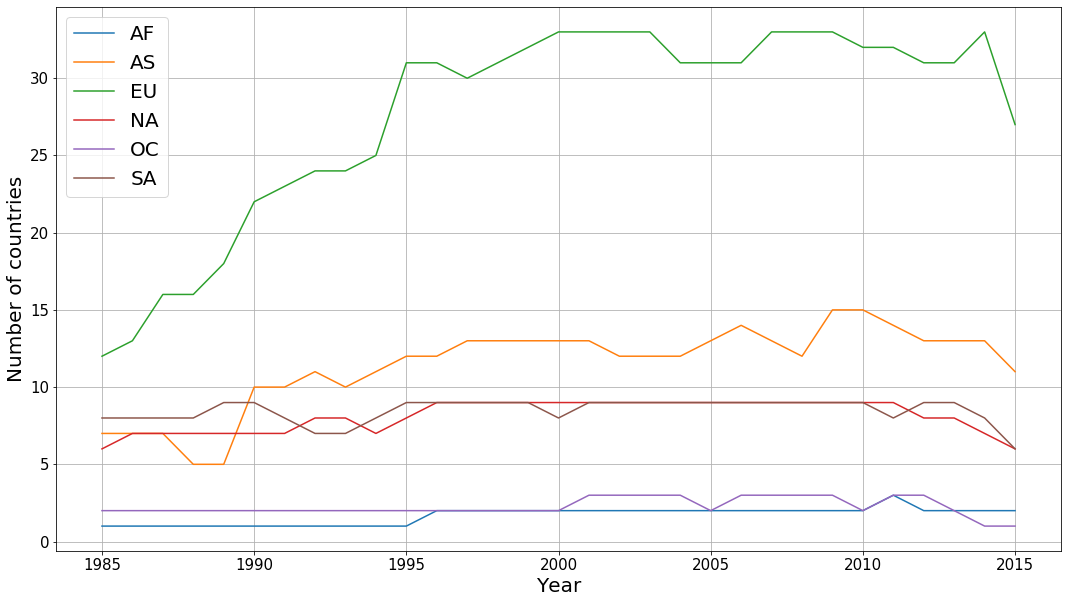

In [36]:
master_good2 = master_good.groupby(['year','country','continent'])['continent'].count()
master_good2.groupby(['year','continent']).count().unstack().plot()

pplt.legend(loc='upper left', fontsize=20)
pplt.xticks(fontsize=15)
pplt.yticks(fontsize=15)
pplt.xlabel('Year',fontsize=20)
pplt.ylabel('Number of countries',fontsize=20)
pplt.grid()

<b>Investigating recession effects on suicide rates</b>

We will make a dataframe from the master_good dataframe which contains data for only the countries most affected by the recession. These countries being Argentina, Ukraine, Ireland, and Russia along with United States for comparison.

In [37]:
countries_affected = ['Argentina','Ukraine','Ireland','United States','Russia']

In [38]:
recession_df = master_good[((master_good['country'] == 'Argentina')
                          | (master_good['country'] == 'Ukraine')
                          | (master_good['country'] == 'Ireland')
                          | (master_good['country'] == 'United States')
                          | (master_good['country'] == 'Russia'))
                           & ((master_good['year'] > 2001) & (master_good['year'] < 2013))
                          ]

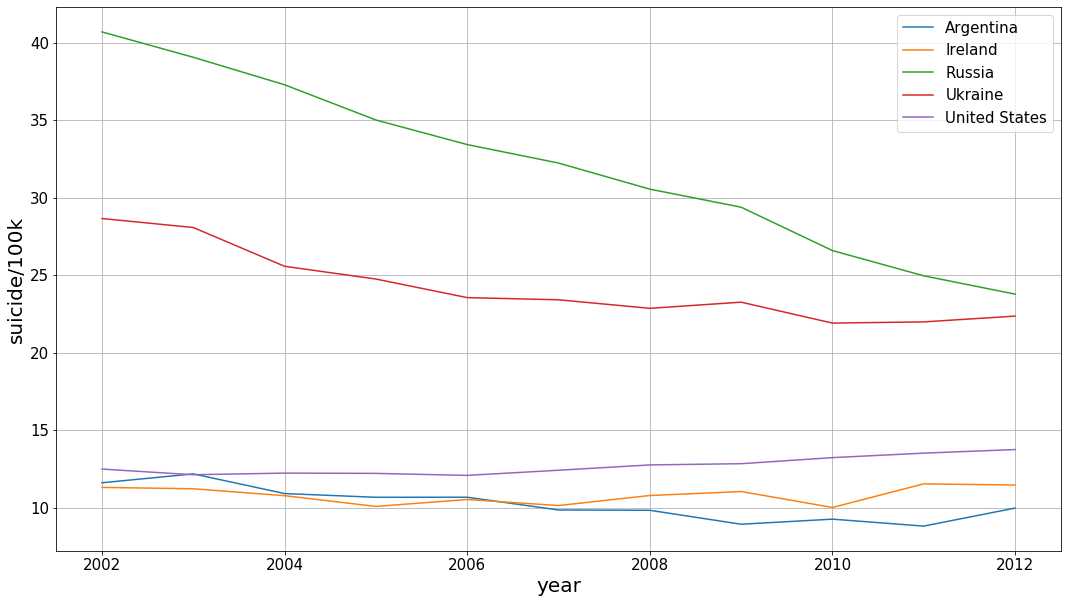

In [39]:
recession_df.groupby(['year','country'])['suicides/100k pop'].mean().unstack().plot()

pplt.legend(loc='upper right', fontsize=15)
pplt.xticks(fontsize=15)
pplt.yticks(fontsize=15)
pplt.xlabel('year',fontsize=20)
pplt.ylabel('suicide/100k',fontsize=20)
pplt.grid()

<b>Investigating effect of HDI</b>

Checking for null values, there are quite a few null values for HDI column.

In [40]:
master_good.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          15360
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
Type                      0
iso3                      0
continent                 0
dtype: int64

We'll make a new dataframe that consists of only rows that contain a value for HDI.

In [41]:
hdi_only = master_good[master_good['HDI for year'].notnull()]

From this point, another dataframe will be made which will group the hdi_only dataframe so as to get a combined annual suicide rate for each year and each country.

In [42]:
hdi_grouped = hdi_only.groupby(['year','country'], as_index=False).agg({'suicides/100k pop': 'mean', 'HDI for year': 'mean'})
hdi_grouped

,year,country,suicides/100k pop,HDI for year
0,1985,Argentina,11.205833,0.694
1,1985,Austria,32.067500,0.764
2,1985,Belgium,27.670000,0.774
3,1985,Brazil,4.931667,0.576
4,1985,Canada,13.871667,0.827
...,...,...,...,...
564,2014,Ukraine,20.875000,0.747
565,2014,United Kingdom,6.994167,0.907
566,2014,United States,14.277500,0.915
567,2014,Uruguay,20.720000,0.793


Text(0.5, 0, 'HDI')

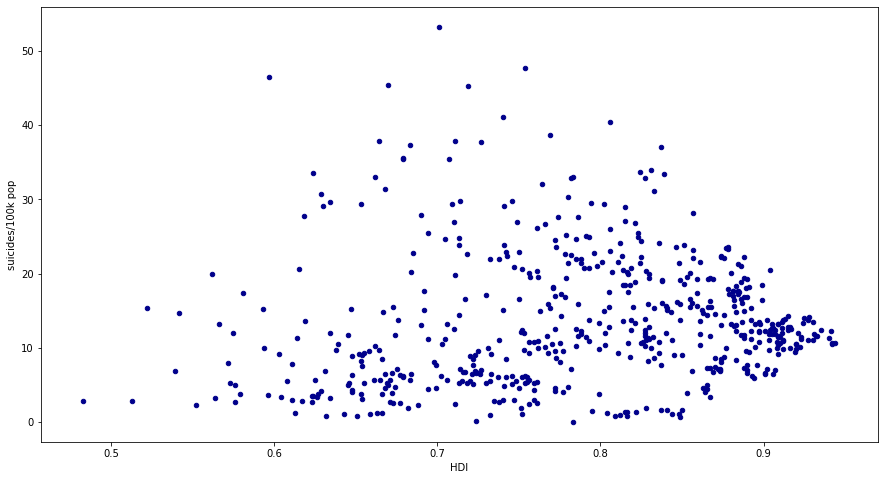

In [45]:
hdi_grouped.plot.scatter(x='HDI for year',y='suicides/100k pop', c='DarkBlue', figsize=(15,8))
pplt.xlabel('HDI')

In [46]:
hdi_grouped.corr()

,year,suicides/100k pop,HDI for year
year,1.000000,-0.141373,0.375302
suicides/100k pop,-0.141373,1.000000,0.088042
HDI for year,0.375302,0.088042,1.000000


Defining a function in order to classify HDI as very high, high, medium and low. A new column will be made which will classify the suicide rate on each row.

In [47]:
def classify_hdi(dataframe):
    if dataframe['HDI for year'] > 0.9:
        return 'Very High'
    elif dataframe['HDI for year'] > 0.8:
        return 'High'
    elif dataframe['HDI for year'] > 0.55:
        return 'Medium'
    else:
        return 'Low'

In [48]:
hdi_grouped['HDI_Class']=hdi_grouped.apply(classify_hdi, axis=1)
hdi_grouped

,year,country,suicides/100k pop,HDI for year,HDI_Class
0,1985,Argentina,11.205833,0.694,Medium
1,1985,Austria,32.067500,0.764,Medium
2,1985,Belgium,27.670000,0.774,Medium
3,1985,Brazil,4.931667,0.576,Medium
4,1985,Canada,13.871667,0.827,High
...,...,...,...,...,...
564,2014,Ukraine,20.875000,0.747,Medium
565,2014,United Kingdom,6.994167,0.907,Very High
566,2014,United States,14.277500,0.915,Very High
567,2014,Uruguay,20.720000,0.793,Medium


Plotting the mean suicide rate of each class to check for any relation. 

Text(0, 0.5, 'suicide/100k')

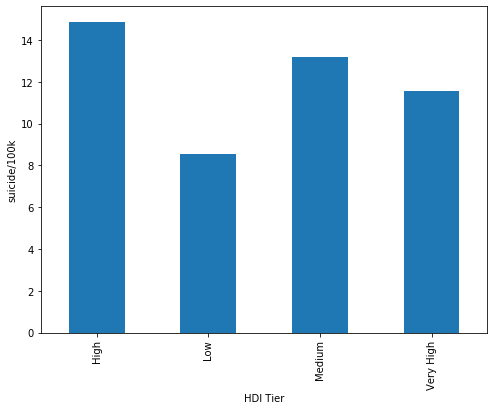

In [49]:
hdi_grouped.groupby('HDI_Class')['suicides/100k pop'].mean().plot(kind='bar', figsize=(8,6))

#pplt.xticks(fontsize=20)
#pplt.yticks(fontsize=20)
pplt.xlabel('HDI Tier',fontsize=10)
pplt.ylabel('suicide/100k',fontsize=10)
#pplt.figure(figsize=(10,5))

In [50]:
hdi_grouped.groupby('HDI_Class')['HDI_Class'].count()

HDI_Class
High         215
Low            5
Medium       283
Very High     66
Name: HDI_Class, dtype: int64

MAPPING RATES FOR 2015 ON WORLD MAP

In [51]:
import fiona

In [52]:
def suicide_values_by_year(year):
    years = [year]
    master_good_year = master_good[master_good['year'].isin(years)]
    master_good_year = master_good_year.groupby('country', as_index=False).agg({'suicides/100k pop': 'mean'})

    mapper = country(from_key='name', to_key='iso3')

    country_index = {}

    master_good_year['iso3'] = master_good_year.country.apply(lambda x: country_index.get(x, mapper(x)))
    assert all(~master_good_year['iso3'].isna())
    master_good_year.drop(['country'], axis=1, inplace=True)
    master_good_year.rename({'iso3': 'iso_a3'}, axis=1, inplace=True)
    master_good_year.set_index('iso_a3', inplace=True)
    
    return master_good_year['suicides/100k pop']

In [53]:
import geopandas as gpd

def create_map(year):
    year_to_run= year

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
    world = world[world.name != 'Antarctica']

    values = suicide_values_by_year(year_to_run)
    #master_good_2015['suicides/100k pop']
    values.name = 'suicides/100k pop'

    world= world.join(values,on='iso_a3')


    known = world.dropna(subset=['suicides/100k pop'])
    unknown = world[world['suicides/100k pop'].isna()]

    ax = known.plot(column='suicides/100k pop', cmap='inferno_r', figsize=(20, 12), scheme='fisher_jenks', k=9, legend=True, edgecolor='#aaaaaa')
    unknown.plot(ax=ax, color='#ffffff', hatch='//', edgecolor='#aaaaaa')

    ax.set_title('Suicide rates per 100K for year '+str(year_to_run), fontdict={'fontsize': 20}, loc='left')
    description = ''''''.strip()
    ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

    ax.set_axis_off()
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((.11, .4))
    legend.prop.set_size(12)

In [54]:
interact(create_map, year=widgets.IntSlider(min=1985, max=2015, step=1, value=2015))

interactive(children=(IntSlider(value=2015, description='year', max=2015, min=1985), Output()), _dom_classes=(…

<function __main__.create_map(year)>

Developed vs developing male and female

In [55]:
developed_df = master_good.groupby(['year','Type','sex'], as_index=False)['suicides/100k pop'].mean()
developed_df.set_index('year', inplace=True)
developed_df

,Type,sex,suicides/100k pop
year,,,
1985,Developing,female,7.169259
1985,Developing,male,21.168056
1986,Developed,female,6.530000
1986,Developed,male,23.376667
1986,Developing,female,6.937810
...,...,...,...
2014,Developing,male,20.136275
2015,Developed,female,6.102971
2015,Developed,male,18.595362


Text(0.5, 1.0, 'Developing')

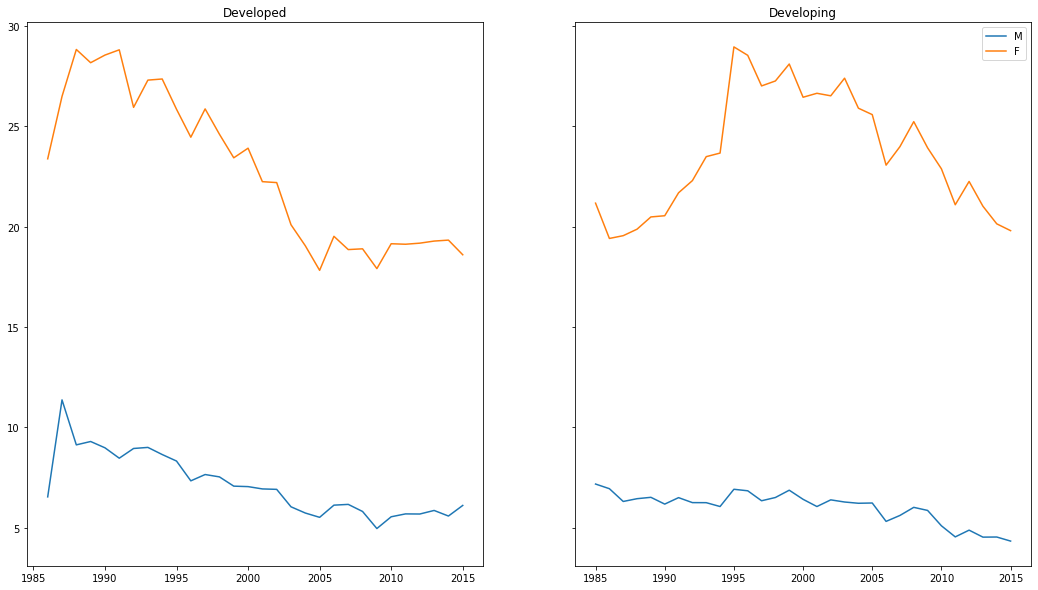

In [56]:
developed_df = master_good.loc[master_good['Type']=='Developed']
developing_df = master_good.loc[master_good['Type']=='Developing']
developing_df_grouped = developing_df.groupby(['year','sex'])['suicides/100k pop'].mean().unstack()
developed_df_grouped = developed_df.groupby(['year','sex'])['suicides/100k pop'].mean().unstack()
f, (ax1, ax2) = pplt.subplots(1, 2, sharey=True)
ax1.plot(developed_df_grouped)
pplt.gca().legend(('M','F'))
ax1.set_title('Developed')
ax2.plot(developing_df_grouped)
pplt.gca().legend(('M','F'))
ax2.set_title('Developing')

In [57]:
hdi_grouped = hdi_only.groupby(['year','age','country']).agg({'suicides/100k pop': 'mean', 'HDI for year': 'mean'})
hdi_grouped['HDI_Class']=hdi_grouped.apply(classify_hdi, axis=1)

hdi_grouped

suicides/100k pop  HDI for year  HDI_Class
year age         country                                                   
1985 15-24 years Argentina                   4.695         0.694     Medium
                 Austria                    19.775         0.764     Medium
                 Belgium                     9.245         0.774     Medium
                 Brazil                      3.410         0.576     Medium
                 Canada                     14.570         0.827       High
...                                            ...           ...        ...
2014 75+ years   Ukraine                    40.770         0.747     Medium
                 United Kingdom              7.315         0.907  Very High
                 United States              21.480         0.915  Very High
                 Uruguay                    38.220         0.793     Medium
                 Uzbekistan                  5.070         0.675     Medium

[3414 rows x 3 columns]

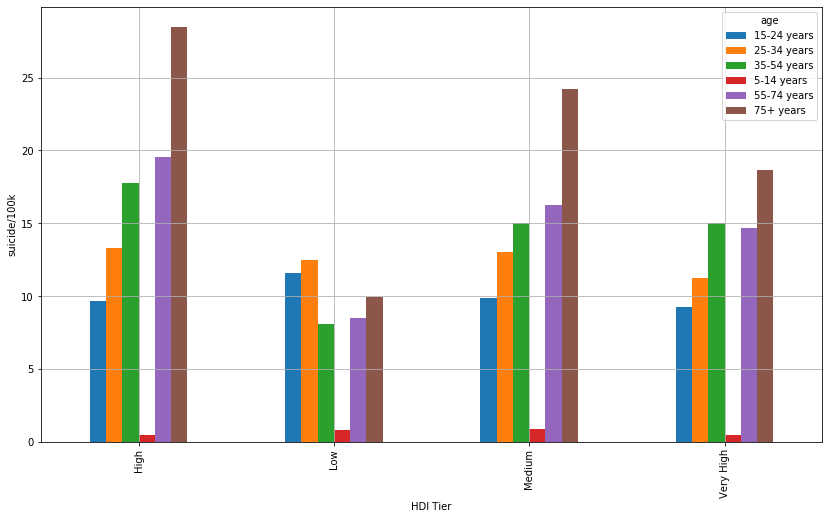

In [58]:
hdi_grouped.groupby(['HDI_Class','age'])['suicides/100k pop'].mean().unstack().plot(kind='bar', figsize=(14,8))

#pplt.xticks(fontsize=20)
#pplt.yticks(fontsize=20)
pplt.xlabel('HDI Tier',fontsize=10)
pplt.ylabel('suicide/100k',fontsize=10)
#pplt.figure(figsize=(10,5))
pplt.grid()